In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import profile_conversion
from __future__ import division
from statistics import mode
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering as SC
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import itertools

In [2]:
data = pd.read_csv("./similarity.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
0,1.000000,0.154615,0.052371,0.128242,0.117036,0.096753,0.106672,0.216381,0.105924,0.244316,...,0.195271,0.106780,0.287842,0.079860,0.139011,0.123382,0.176458,0.036928,0.207757,0.293838
1,0.154615,1.000000,0.014598,0.096306,0.063149,0.057980,0.082548,0.126921,0.082246,0.185646,...,0.131949,0.115271,0.177713,0.045531,0.082933,0.068841,0.115422,0.021049,0.176515,0.116874
2,0.052371,0.014598,1.000000,0.064683,0.024209,0.074545,0.165473,0.031903,0.047440,0.013153,...,0.050454,0.054226,0.014359,0.115394,0.072427,0.015733,0.106158,0.033604,0.066445,0.026192
3,0.128242,0.096306,0.064683,1.000000,0.096306,0.074620,0.114210,0.257796,0.084923,0.113493,...,0.110993,0.083623,0.178426,0.097085,0.126835,0.088869,0.145613,0.051699,0.133769,0.155928
4,0.117036,0.063149,0.024209,0.096306,1.000000,0.063622,0.090841,0.116372,0.086262,0.078547,...,0.117952,0.074103,0.098842,0.103589,0.090239,0.067769,0.109755,0.036189,0.149799,0.063875


In [3]:
follower_counts = [[x] for x in profile_conversion.get_all_followers()]

In [4]:
#Comp1, Comp2, Followers, 
pca = PCA(n_components=2)
pca_data = pca.fit(data).transform(data)
pca_data = np.hstack((pca_data,follower_counts))
np.savetxt("pca.csv", pca_data, delimiter=",")
pca_data

array([[  6.35734961e-01,  -2.92212716e-01,   1.93150000e+04],
       [ -8.28878508e-01,   1.42423306e-01,   2.21327000e+05],
       [ -1.54250990e+00,   7.32647151e-01,   2.17691900e+06],
       ..., 
       [ -1.81027490e+00,  -2.09951627e-01,   2.47500000e+03],
       [  1.36942183e+00,  -6.26955954e-01,   1.51420000e+04],
       [  6.80546381e-01,   6.33924282e-01,   2.08796000e+05]])

In [5]:
pca_x = [x[0] for x in pca_data]
pca_y = [y[1] for y in pca_data]

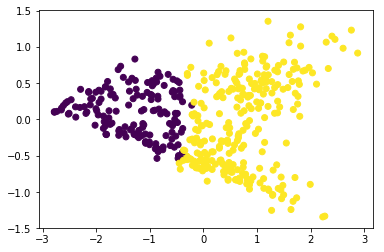

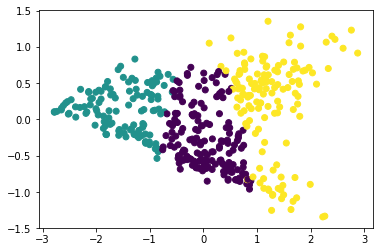

In [6]:
estimator = GaussianMixture(n_components = 2, covariance_type = "diag")
estimator.fit(data)
predG = estimator.predict(data)

plt.scatter(pca_x, pca_y, c=predG)
plt.show()

estimator = GaussianMixture(n_components = 3, covariance_type = "diag")
estimator.fit(data)
predG = estimator.predict(data)

plt.scatter(pca_x, pca_y, c=predG)
plt.show()

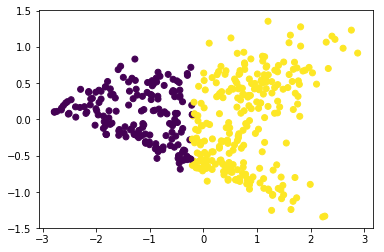

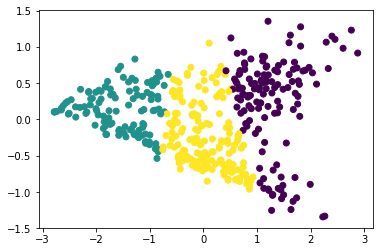

In [7]:
kmeans = KMeans(n_clusters = 2)
predK = kmeans.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predK)
plt.show()

kmeans = KMeans(n_clusters = 3)
predK = kmeans.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predK)
plt.show()

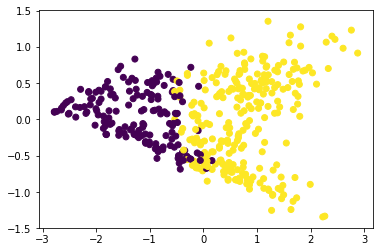

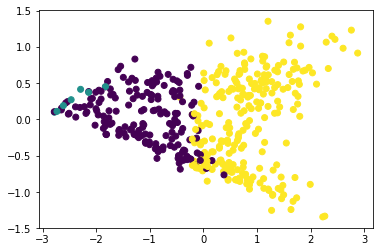

In [8]:
spectral = SC(n_clusters = 2, affinity = 'precomputed')
predS = spectral.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predS)
plt.show()

spectral = SC(n_clusters = 3, affinity = 'precomputed')
predS = spectral.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predS)
plt.show()

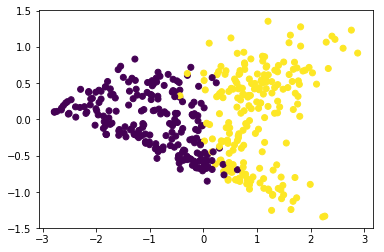

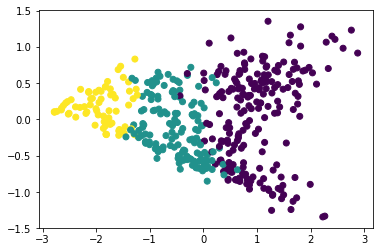

In [9]:
agg = AgglomerativeClustering(n_clusters = 2)
predA = agg.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predA)
plt.show()

agg = AgglomerativeClustering(n_clusters = 3)
predA = agg.fit_predict(data)

plt.scatter(pca_x, pca_y, c=predA)
plt.show()

In [10]:
names = profile_conversion.get_all_names()
names

[u'Justin Sink',
 u'Howard Fineman',
 u'Michelle Malkin',
 u'Paul Singer',
 u'Peggy Noonan',
 u'David Shepardson',
 u'Susan Joan Archer',
 u'Susan Page',
 u'Alex Leary',
 u'John Harwood',
 u'john r stanton',
 u'E!!',
 u'Michael Roston',
 u'Scott Wong',
 u'Amy Chozick',
 u'Arianna Huffington',
 u'Kevin Robillard',
 u'Juana Summers Markland',
 u'Paul Lewis',
 u'michaelscherer',
 u'Josh Hafner',
 u'Sean Hannity',
 u'SarahBakerNBC',
 u'Maeve Reston',
 u'Patricia DiCarlo',
 u'Ron Fournier',
 u'MATT DRUDGE',
 u'Max Fisher',
 u'Michael D. Shear',
 u'Christina Wilkie',
 u'Roger Simon',
 u'Frank Thorp V',
 u'Mike Allen',
 u'Madeline Marshall',
 u'HowardKurtz',
 u"Mike O'Brien",
 u'Michael McAuliff',
 u'Steve Contorno',
 u'Chris Suellentrop',
 u'Anna Palmer',
 u'Jonathan Strong',
 u'Tom Curry',
 u'John Berman',
 u'Jamie Dupree',
 u'Adam Smith',
 u'Matt Lewis',
 u'Ann Coulter',
 u'Steven Shepard',
 u'Jon Ralston',
 u'Caroline Horn',
 u'Bill Keller',
 u'Michelle Jaconi \U0001f4a5',
 u'James Bennet

In [11]:
#-1 is left, 0 is centrist, 1 is right
truth = pd.read_csv("./InfluentialJournalists.csv", header = None).as_matrix()
truth

array([['Matt Drudge', 1],
       ['Ann Coulter', 1],
       ['Megyn Kelly', 1],
       ['Maggie Haberman', 0],
       ['Andrea Mitchell', 0],
       ['Wolf Blitzer', 0],
       ['Christiane Amanpour', -1],
       ['Donna Brazile', -1],
       ['Fareed Zakaria', -1],
       ['Sean Hannity', 1],
       ['Mark Knoller', 0],
       ['Charles Krauthammer', 1],
       ['Dana Perino', 1],
       ["Bill O'Reilly", 1],
       ['Arianna Huffington', -1],
       ['Joe Scarborough', 0],
       ["Norah O'Donnell", 0],
       ['Ann Curry', -1],
       ['David Frum', 0],
       ['Jonathan Martin', 0],
       ['Bret Baier', 1],
       ['Ezra Klein', -1],
       ['Melissa Harris-Perry', -1],
       ['Glenn Beck', 1],
       ['GeorgeStephanopoulos', -1],
       ['Paul Krugman', -1],
       ['Nicholas Kristof', -1],
       ['Ed Henry', 1],
       ['Rachel Maddow MSNBC', -1],
       ['Glenn Greenwald', -1],
       ['Greta Van Susteren', 1],
       ['Michelle Malkin', 1],
       ['HowardKurtz', 0],
      

In [12]:
truth = pd.read_csv("./InfluentialJournalists.csv", header = None).as_matrix()
truth[0][0] = 'MATT DRUDGE'
truth[16][0] = u"Norah O'Donnell\U0001f1fa\U0001f1f8"
truth = np.delete(truth,18,0)
truth = np.delete(truth,20,0)
truth = np.delete(truth,24,0)
truth = np.delete(truth,33,0)
truth = np.delete(truth,38,0)

truth_indexes = [[names.index(x[0]),x[1]] for x in truth]
truth_indexes

[[26, 1],
 [46, 1],
 [251, 1],
 [223, 0],
 [305, 0],
 [269, 0],
 [418, -1],
 [232, -1],
 [352, -1],
 [21, 1],
 [399, 0],
 [163, 1],
 [264, 1],
 [401, 1],
 [15, -1],
 [209, 0],
 [427, 0],
 [147, -1],
 [168, 0],
 [98, 1],
 [132, -1],
 [334, 1],
 [150, -1],
 [178, -1],
 [247, 1],
 [253, -1],
 [79, -1],
 [302, 1],
 [2, 1],
 [34, 0],
 [82, 0],
 [160, -1],
 [394, -1],
 [303, 1],
 [307, 0],
 [32, 0],
 [317, 0],
 [413, 0],
 [389, -1]]

In [13]:
agg = AgglomerativeClustering(n_clusters = 3)
predA = agg.fit_predict(data)

agg = AgglomerativeClustering(n_clusters = 3)
predA = agg.fit_predict(data)

agg = AgglomerativeClustering(n_clusters = 3)
predA = agg.fit_predict(data)

In [14]:
perms = list(itertools.permutations([0, 1, 2]))
pred = [predG, predK, predS, predA]
scores = [0,0,0,0]
for perm in perms:
    temp_scores = [0,0,0,0]
    for j in range(0,4):
        for i in truth_indexes:
            if pred[j][i[0]]==perm[i[1]+1]:
                temp_scores[j] += 1
        if temp_scores[j] > scores[j]:
            scores[j] = temp_scores[j]
    
scores = [x / len(truth_indexes) for x in scores]
scores

[0.38461538461538464,
 0.38461538461538464,
 0.48717948717948717,
 0.46153846153846156]

In [15]:
compare = [t[1] for t in truth_indexes]
# print(compare.count(0))
# print(compare.count(1))
# print(compare.count(-1))
baseline = compare.count(0) / len(compare)
baseline

0.3333333333333333

In [23]:
descriptions = profile_conversion.get_all_descriptions()

clean_names = [n.encode('utf-8').strip() for n in names]
clean_descriptions = [n.encode('utf-8').strip() for n in descriptions]
clean_names

['Justin Sink',
 'Howard Fineman',
 'Michelle Malkin',
 'Paul Singer',
 'Peggy Noonan',
 'David Shepardson',
 'Susan Joan Archer',
 'Susan Page',
 'Alex Leary',
 'John Harwood',
 'john r stanton',
 'E!!',
 'Michael Roston',
 'Scott Wong',
 'Amy Chozick',
 'Arianna Huffington',
 'Kevin Robillard',
 'Juana Summers Markland',
 'Paul Lewis',
 'michaelscherer',
 'Josh Hafner',
 'Sean Hannity',
 'SarahBakerNBC',
 'Maeve Reston',
 'Patricia DiCarlo',
 'Ron Fournier',
 'MATT DRUDGE',
 'Max Fisher',
 'Michael D. Shear',
 'Christina Wilkie',
 'Roger Simon',
 'Frank Thorp V',
 'Mike Allen',
 'Madeline Marshall',
 'HowardKurtz',
 "Mike O'Brien",
 'Michael McAuliff',
 'Steve Contorno',
 'Chris Suellentrop',
 'Anna Palmer',
 'Jonathan Strong',
 'Tom Curry',
 'John Berman',
 'Jamie Dupree',
 'Adam Smith',
 'Matt Lewis',
 'Ann Coulter',
 'Steven Shepard',
 'Jon Ralston',
 'Caroline Horn',
 'Bill Keller',
 'Michelle Jaconi \xf0\x9f\x92\xa5',
 'James Bennet',
 'Russell Berman',
 'Aaron Blake',
 'Dan Bal

In [17]:
predA

array([0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0,
       2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2,

In [18]:
predA_fixed = [2 if i == 1 else 1 if i == 2 else 0 for i in predA]
predK_fixed = [1 if i == 0 else 2 if i == 1 else 0 for i in predK]

In [26]:
pca_df = pd.DataFrame(data=pca_data,columns=['Comp1','Comp2','Followers'])
pca_df['Names'] = clean_names
pca_df['Gaussian'] = predG
pca_df['Spectral'] = predS
pca_df['Agglomerative'] = predA_fixed
pca_df['KMeans'] = predK_fixed
pca_df['Descriptions'] = clean_descriptions
pca_df

,Comp1,Comp2,Followers,Names,Gaussian,Spectral,Agglomerative,KMeans,Descriptions
0,0.635735,-0.292213,19315.0,Justin Sink,0,2,0,0,I write about the White House for Bloomberg @b...
1,-0.828879,0.142423,221327.0,Howard Fineman,1,0,2,2,"https://t.co/Z73is4fJ3x|NBC/MSNBC|Author, The ..."
2,-1.542510,0.732647,2176919.0,Michelle Malkin,1,0,1,2,Little brown woman. Big mouth. Wife. Mom. Entr...
3,0.117042,-0.071134,15291.0,Paul Singer,0,2,0,0,Investigations editor at @NECIRBU and @WGBH. I...
4,-0.958536,0.330092,169070.0,Peggy Noonan,1,0,2,2,WSJ columnist and author of nine books on US p...
5,-0.723893,0.104381,14135.0,David Shepardson,1,0,2,2,"@Reuters reporter covering transportation, aut..."
6,-0.274555,-0.533869,1806.0,Susan Joan Archer,0,0,2,0,Journalist | Producer | Videographer - @nbcnew...
7,1.401526,0.743299,54663.0,Susan Page,2,2,0,1,Washington Bureau Chief/USA Today. Veteran of ...
8,-0.540608,-0.383447,11926.0,Alex Leary,0,0,2,0,Washington Bureau Chief - Tampa Bay Times lear...
9,-0.101943,0.051946,187740.0,John Harwood,0,2,2,0,"a Dad who covers Washington, the economy and n..."


In [27]:
pca_df.to_csv('pca.csv')